# Assorted tests, quick-and-dirty verification
Let's give the whole pipeline a try.

## Check a specific candidate ODE system
This is just to verify that everything is running correctly.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import integrate
from sklearn.metrics import r2_score
from sympy import parse_expr

# these are local libraries
from optimize_ode_systems import dX_dt
from local_utility import MyTimeoutError, run_process_with_timeout

# set stule for plots
sns.set_style('darkgrid')

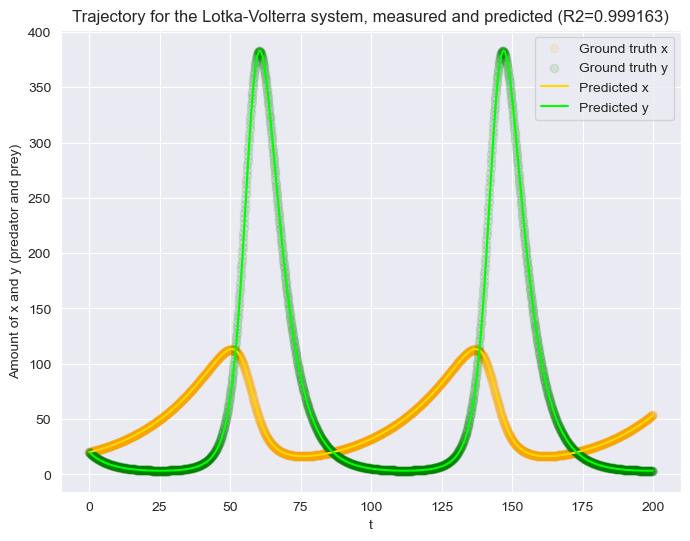

In [2]:
# file containing the specific ODE system
candidate_ode_system_file_name = "2024-07-03-13-15-55-lotka-volterra/candidate_systems/candidate-ode-system-33.txt"
# file with the ground truth data
ground_truth_file_name = "2024-07-03-13-15-55-lotka-volterra/lotka-volterra.csv"

# load the ground truth and prepare data for plots
df_data = pd.read_csv(ground_truth_file_name)
df_data = df_data.iloc[:2000]
variables_list = [c for c in df_data.columns if c != "t"]
t = df_data["t"].values
x = df_data["x"].values
y = df_data["y"].values

# load the system, parse it with sympy and solve it for the initial conditions
candidate_equations = None
with open(candidate_ode_system_file_name, "r") as fp :
    lines = [l.strip().split("=")[1] for l in fp.readlines()]
    candidate_equations = {variables_list[i] : parse_expr(lines[i]) 
                           for i in range(0, len(variables_list))}

# prepare all the necessary arguments for odeint
initial_conditions = [df_data[v].values[0] for v in variables_list]
args = (dX_dt, initial_conditions, t)
kwargs = {'args' : (candidate_equations, variables_list, ), 'full_output' : True}
timeout = 60

# run the odeint process (with a timeout, as it could get stuck)
Y, info_dict = run_process_with_timeout(integrate.odeint, timeout, args, kwargs)

# also compute R2 value
r2_value = r2_score(df_data[variables_list].values, Y)

# plot the result
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(t, x, marker="o", color="orange", alpha=0.1, label="Ground truth x")
ax.scatter(t, y, marker="o", color="green", alpha=0.1, label="Ground truth y")
ax.plot(t, Y[:,0], color="gold", label="Predicted x")
ax.plot(t, Y[:,1], color="lime", label="Predicted y")
ax.set_xlabel("t")
ax.set_ylabel("Amount of x and y (predator and prey)")
ax.set_title("Trajectory for the Lotka-Volterra system, measured and predicted (R2=%.6f)" % r2_value)
ax.legend(loc='best')

{'x': -0.987161*y - z, 'y': x + 0.14664868*y, 'z': z*(0.01559881*x - 4.0344515)}
[[ 1.          1.          1.        ]
 [ 0.81386414  1.11162636  0.63494533]
 [ 0.64681581  1.20776547  0.40197829]
 ...
 [-6.52330751  2.72750009  0.01674551]
 [-6.76718686  2.1109064   0.01633164]
 [-6.94762722  1.46038797  0.01602063]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 8.13570040e-01  1.10595313e+00  6.68958281e-01]
 [ 6.44761868e-01  1.19565474e+00  4.47381748e-01]
 ...
 [ 5.14660186e+01 -6.59000541e+00  5.01199328e-13]
 [ 5.18652116e+01 -1.47854091e+00 -1.79891465e-14]
 [ 5.17549603e+01  3.72312591e+00 -9.91833561e-14]]


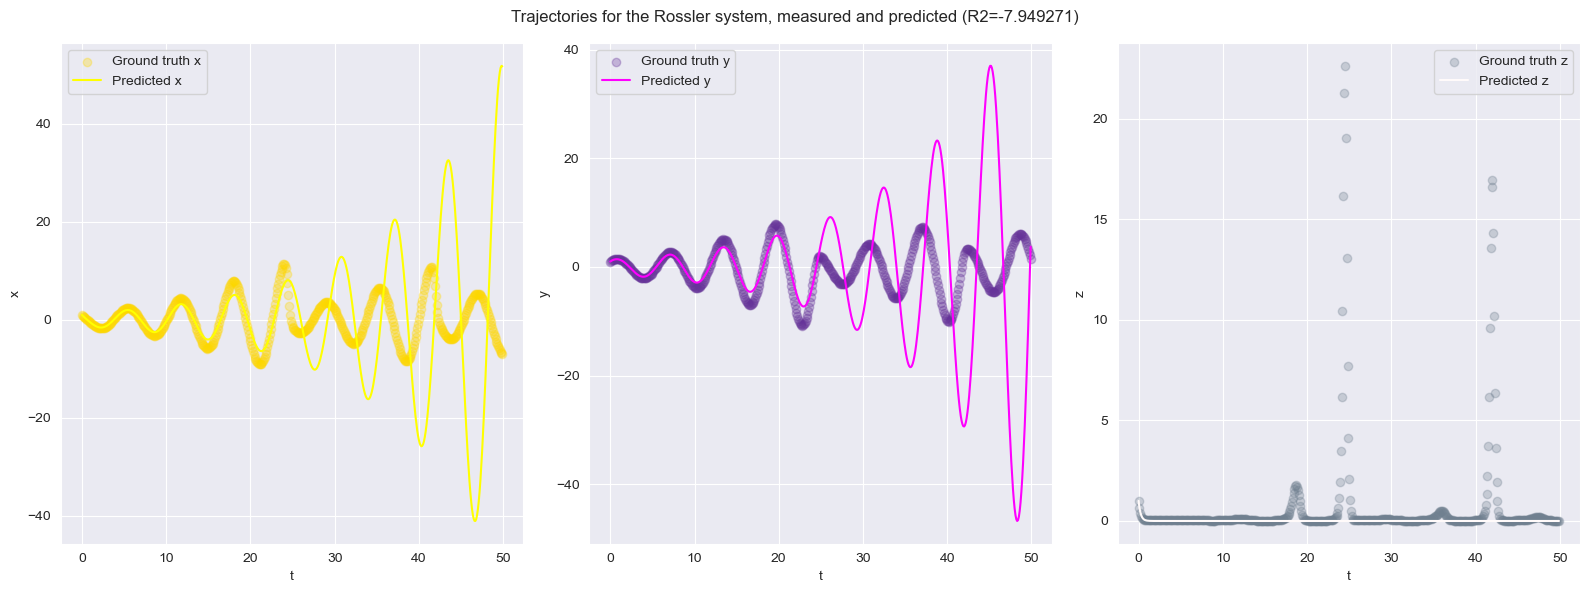

In [3]:
# so, that worked pretty well! let's try to do the same for Rossler's system
# Rossler is much more difficult; the candidate system closest to the truth should be #141,
# but #141 has a poor performance; the 'best' as evaluated by the method is #1188
candidate_ode_system_file_name = "../local_results/2024-07-04-20-23-32-rossler/candidate_systems/candidate-ode-system-141.txt"
#candidate_ode_system_file_name = "../local_results/2024-07-04-20-23-32-rossler/candidate_systems/candidate-ode-system-1188.txt"
ground_truth_file_name = "../local_results/2024-07-04-20-23-32-rossler/rossler.csv"

# load the ground truth and prepare data for plots
df_data = pd.read_csv(ground_truth_file_name)
df_data = df_data.iloc[:500]
variables_list = [c for c in df_data.columns if c != "t"]
t = df_data["t"].values
x = df_data["x"].values
y = df_data["y"].values
z = df_data["z"].values

# load the system, parse it with sympy and solve it for the initial conditions
candidate_equations = None
with open(candidate_ode_system_file_name, "r") as fp :
    lines = [l.strip().split("=")[1] for l in fp.readlines()]
    candidate_equations = {variables_list[i] : parse_expr(lines[i]) 
                           for i in range(0, len(variables_list))}

# this is just a quick-and-dirty way of checking one thing
#candidate_equations["z"] = parse_expr("z*(0.01559881*x - 4.0344515) + 0.2")
#candidate_equations["x"] = parse_expr("-y -z")
#candidate_equations["y"] = parse_expr("x + 0.2 * y")
#candidate_equations["z"] = parse_expr("0.2 + z * (x - 5.7)")
print(candidate_equations)
# prepare all the necessary arguments for odeint
initial_conditions = [df_data[v].values[0] for v in variables_list]
args = (dX_dt, initial_conditions, t)
kwargs = {'args' : (candidate_equations, variables_list, ), 'full_output' : True}
timeout = 60

# run the odeint.integrate process with a timeout
Y, info_dict = run_process_with_timeout(integrate.odeint, timeout, args, kwargs)

# plot the result; plotting them all in a single subplot is too confusing
fig, axs = plt.subplots(figsize=(16,6), nrows=1, ncols=3)
axs[0].scatter(t, x, marker="o", color="gold", alpha=0.3, label="Ground truth x")
axs[1].scatter(t, y, marker="o", color="rebeccapurple", alpha=0.3, label="Ground truth y")
axs[2].scatter(t, z, marker="o", color="slategray", alpha=0.3, label="Ground truth z")

axs[0].plot(t, Y[:,0], color="yellow", label="Predicted x")
axs[1].plot(t, Y[:,1], color="fuchsia", label="Predicted y")
axs[2].plot(t, Y[:,2], color="snow", label="Predicted z")

r2_value = r2_score(df_data[variables_list].values, Y)

fig.suptitle("Trajectories for the Rossler system, measured and predicted (R2=%.6f)" % r2_value)
for ax in axs :
    ax.legend(loc='best')
    ax.set_xlabel("t")
    
axs[0].set_ylabel("x")
axs[1].set_ylabel("y")
axs[2].set_ylabel("z")

fig.tight_layout()
print(df_data[variables_list].values)
print(Y)

## Test symbolic expressions
This is just a quick-and-dirty test for symbolic expressions.

In [66]:
from sympy import parse_expr, simplify, sympify

expression_string = "2*x + z - x - z -x"
expression = parse_expr(expression_string)

if expression.is_constant() and expression == 0 :
    print("Not only the expression is constant, but it also reduces to zero.")

Not only the expression is constant, but it also reduces to zero.


## Overfitted systems
An example of overfitting for Lotka-Volterra

Text(0.5, 1.0, 'Lotka-Volterra, different parameters')

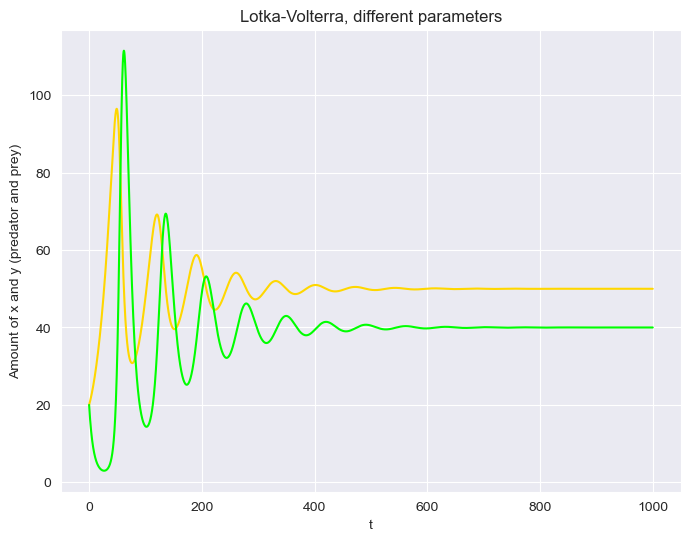

In [15]:
candidate_ode_system_file_name = "2024-07-03-13-15-55-lotka-volterra/candidate_systems/candidate-ode-system-139.txt"
ground_truth_file_name = "2024-07-03-13-15-55-lotka-volterra/lotka-volterra.csv"

df_data = pd.read_csv(ground_truth_file_name)
#df_data = df_data.iloc[:3000]
variables_list = [c for c in df_data.columns if c != "t"]
x = df_data["x"].values
y = df_data["y"].values
t = df_data["t"].values

# load the system, parse it with sympy and solve it for the initial conditions
candidate_equations = None
with open(candidate_ode_system_file_name, "r") as fp :
    lines = [l.strip().split("=")[1] for l in fp.readlines()]
    candidate_equations = {variables_list[i] : parse_expr(lines[i]) 
                           for i in range(0, len(variables_list))}

candidate_equations["x"] = parse_expr("0.04 * x - 0.0005 * x * y - 1e-5 * x**2 * y" )
candidate_equations["y"] = parse_expr("-0.2 * y + 0.004 * x * y")# + 1e-6 * x * y**2")

#candidate_equations["x"] = parse_expr("x - 10 * x * y")
#candidate_equations["y"] = parse_expr("-2 * y + 0.1 * x * y")


initial_conditions = [df_data[v].values[0] for v in variables_list]
#initial_conditions = ["20", "20"] 
args = (dX_dt, initial_conditions, t)
kwargs = {'args' : (candidate_equations, variables_list, ), 'full_output' : True}
timeout = 600
# run the odeint.integrate process with a timeout
Y, info_dict = run_process_with_timeout(integrate.odeint, timeout, args, kwargs)

# plot the result
fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(t, x, marker="o", color="orange", alpha=0.1, label="Ground truth x")
#ax.scatter(t, y, marker="o", color="green", alpha=0.1, label="Ground truth y")
ax.plot(t, Y[:,0], color="gold", label="Predicted x")
ax.plot(t, Y[:,1], color="lime", label="Predicted y")
ax.set_xlabel("t")
ax.set_ylabel("Amount of x and y (predator and prey)")
ax.set_title("Lotka-Volterra, different parameters")
#ax.legend(loc='best')

## Check correct equation in Euler's first approximation space
I would like to check that the equation that we know is the correct one actually has the highest possible fitness in the new feature space defined by Euler's first approximation.

In [19]:
# some classic imports
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score
from sympy import expand, parse_expr, simplify, sympify
from sympy.utilities.lambdify import lambdify

In [20]:
# read file with the transformations (this one only exists locally)
euler_data_file_name = "2024-07-09-23-20-16-rossler-stable/rossler-stable-euler.csv"
df_euler = pd.read_csv(euler_data_file_name)

# get the interesting columns
x_0 = df_euler["x_0"].values
x_1 = df_euler["x_1"].values
x_2 = df_euler["x_2"].values
delta_t = df_euler["delta_t"].values
F_x_2 = df_euler["F_x_2"].values


# now, here are the original equation, and the equation closest to the real one that appears among the selected ones 
eq_original_string = "5.0 * (0.2 + x_2 * (-5.7 + x_0)) * delta_t"
eq_found_1_string = "-3.17818865151476*x_0*x_1*x_2 * delta_t"
eq_found_2_string = "-3.17818865151476*x_0*x_2 * delta_t"

# sympify everything
eq_original = parse_expr(eq_original_string)
eq_found_1 = parse_expr(eq_found_1_string)
eq_found_2 = parse_expr(eq_found_2_string)
print(expand(eq_original))

5.0*delta_t*x_0*x_2 - 28.5*delta_t*x_2 + 1.0*delta_t


In [26]:
# now, evaluate the functions by replacing the symbols with values
equation_symbols = [sympify(s) for s in ["x_0", "x_1", "x_2", "delta_t"]]
eq_original_values = lambdify(equation_symbols, eq_original)(x_0, x_1, x_2, delta_t)
print("R2 value of the original equation vs the data:", r2_score(F_x_2, eq_original_values))

eq_found_1_values = lambdify(equation_symbols, eq_found_1)(x_0, x_1, x_2, delta_t)
print("R2 value of the found equation #1 vs the data:", r2_score(F_x_2, eq_found_1_values))

eq_found_2_values = lambdify(equation_symbols, eq_found_2)(x_0, x_1, x_2, delta_t)
print("R2 value of the found equation #2 vs the data:", r2_score(F_x_2, eq_found_2_values))

print("MSE of the different equations: original=%.4e, found_1=%.4e, found_2=%.4e" % 
      (mean_squared_error(F_x_2, eq_original_values), mean_squared_error(F_x_2, eq_found_1_values), mean_squared_error(F_x_2, eq_found_2_values)))

R2 value of the original equation vs the data: 0.05633148298601087
R2 value of the found equation #1 vs the data: 0.9959009192741878
R2 value of the found equation #2 vs the data: 0.9820076662436091
MSE of the different equations: original=4.0063e-05, found_1=1.7402e-07, found_2=7.6385e-07


In [ ]:
# TODO plot some measured vs predicted scheme?